In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("train_data.csv")
data.head()

,name,addition_time,servings,prep_time,cook_time,total_time,ingredints,calories,fat,carbs,protine,rating,like
0,Filipino Ribs,NaN,11,NaN,NaN,NaN,"['spareribs', 'onions', 'wedges', 'onion', 'ch...",773,59g,19g,39g,4.4,good
1,Seafood Gumbo,10 mins,8,15 mins,1 hrs 20 mins,1 hrs 45 mins,"['pepper', 'pepper', 'pepper', 'paprika', 'thy...",357,24g,13g,23g,4.5,good
2,Air-Fried Korean Chicken Wings,NaN,4,10 mins,40 mins,50 mins,"['Honey', 'paste', 'sugar', 'sauce', 'juice', ...",347,12g,45g,16g,4.8,bad
3,Vietnamese Chicken and Long-Grain Rice Congee,NaN,4,10 mins,2 hrs,2 hrs 10 mins,"['rice', 'chicken', 'root', 'grass', 'chopped'...",643,42g,10g,53g,4.5,bad
4,Okra and Tomatoes,NaN,6,10 mins,20 mins,30 mins,"['bacon', 'okra', 'sliced', 'onion', 'chopped'...",94,5g,12g,4g,4.6,good


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1714 non-null   object 
 1   addition_time  642 non-null    object 
 2   servings       1714 non-null   int64  
 3   prep_time      1655 non-null   object 
 4   cook_time      1498 non-null   object 
 5   total_time     1659 non-null   object 
 6   ingredints     1714 non-null   object 
 7   calories       1714 non-null   int64  
 8   fat            1662 non-null   object 
 9   carbs          1686 non-null   object 
 10  protine        1680 non-null   object 
 11  rating         1714 non-null   float64
 12  like           1714 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 174.2+ KB


In [4]:
data.isnull().sum()

name                0
addition_time    1072
servings            0
prep_time          59
cook_time         216
total_time         55
ingredints          0
calories            0
fat                52
carbs              28
protine            34
rating              0
like                0
dtype: int64

In [5]:
data.shape

(1714, 13)

In [6]:
# Since total time might be sum of all times I would just keep total time coulmn remove rest time column.
data = data.drop(columns=['addition_time', 'prep_time', 'cook_time'])
data.head()

,name,servings,total_time,ingredints,calories,fat,carbs,protine,rating,like
0,Filipino Ribs,11,NaN,"['spareribs', 'onions', 'wedges', 'onion', 'ch...",773,59g,19g,39g,4.4,good
1,Seafood Gumbo,8,1 hrs 45 mins,"['pepper', 'pepper', 'pepper', 'paprika', 'thy...",357,24g,13g,23g,4.5,good
2,Air-Fried Korean Chicken Wings,4,50 mins,"['Honey', 'paste', 'sugar', 'sauce', 'juice', ...",347,12g,45g,16g,4.8,bad
3,Vietnamese Chicken and Long-Grain Rice Congee,4,2 hrs 10 mins,"['rice', 'chicken', 'root', 'grass', 'chopped'...",643,42g,10g,53g,4.5,bad
4,Okra and Tomatoes,6,30 mins,"['bacon', 'okra', 'sliced', 'onion', 'chopped'...",94,5g,12g,4g,4.6,good


### First we need to remove suffix from the "g" from weight variables 
### "min", "hour", "day" from time variable and convert it them into min without "min suffix"

In [7]:
data["total_time"].unique()

array([nan, '1 hrs 45 mins', '50 mins', '2 hrs 10 mins', '30 mins',
       '3 hrs 5 mins', '5 mins', '1 hrs 30 mins', '35 mins', '3 hrs',
       '2 hrs 55 mins', '2 hrs 5 mins', '45 mins', '55 mins', '1 hrs',
       '40 mins', '20 mins', '1 hrs 15 mins', '2 hrs 50 mins',
       '4 days 3 hrs 30 mins', '1 hrs 5 mins', '1 hrs 55 mins',
       '10 hrs 5 mins', '25 mins', '3 hrs 40 mins', '1 hrs 10 mins',
       '3 hrs 35 mins', '2 hrs 15 mins', '7 hrs 35 mins', '2 hrs',
       '14 hrs 15 mins', '10 mins', '1 day 3 hrs 20 mins',
       '13 hrs 15 mins', '5 hrs', '5 hrs 45 mins', '21 days 40 mins',
       '1 hrs 40 mins', '2 hrs 40 mins', '1 hrs 20 mins', '8 hrs 55 mins',
       '4 hrs', '15 mins', '1 hrs 34 mins', '7 days 1 hrs 25 mins',
       '10 hrs 30 mins', '3 hrs 30 mins', '3 hrs 45 mins',
       '4 hrs 35 mins', '8 hrs 15 mins', '1 hrs 2 mins', '47 mins',
       '1 hrs 50 mins', '1 hrs 25 mins', '5 days 20 mins',
       '15 hrs 5 mins', '1 hrs 35 mins', '6 days 22 hrs 40 mins',
    

In [8]:
total_time = []
for a in data["total_time"]:
    a = str(a).replace('days', '* (24*60) +')
    a = str(a).replace('day', '* (24*60) +')
    a = str(a).replace('hrs', '* 60 +')
    x = str(a).replace('mins','')
#    y = eval(x)
#    rating.append(y)
    x = str(x).rstrip("+")
    total_time.append(x)
#total_time

In [9]:
data["total_time"] = total_time
data["total_time"].unique()

array(['nan', '1 * 60 + 45 ', '50 ', '2 * 60 + 10 ', '30 ', '3 * 60 + 5 ',
       '5 ', '1 * 60 + 30 ', '35 ', '3 * 60 ', '2 * 60 + 55 ',
       '2 * 60 + 5 ', '45 ', '55 ', '1 * 60 ', '40 ', '20 ',
       '1 * 60 + 15 ', '2 * 60 + 50 ', '4 * (24*60) + 3 * 60 + 30 ',
       '1 * 60 + 5 ', '1 * 60 + 55 ', '10 * 60 + 5 ', '25 ',
       '3 * 60 + 40 ', '1 * 60 + 10 ', '3 * 60 + 35 ', '2 * 60 + 15 ',
       '7 * 60 + 35 ', '2 * 60 ', '14 * 60 + 15 ', '10 ',
       '1 * (24*60) + 3 * 60 + 20 ', '13 * 60 + 15 ', '5 * 60 ',
       '5 * 60 + 45 ', '21 * (24*60) + 40 ', '1 * 60 + 40 ',
       '2 * 60 + 40 ', '1 * 60 + 20 ', '8 * 60 + 55 ', '4 * 60 ', '15 ',
       '1 * 60 + 34 ', '7 * (24*60) + 1 * 60 + 25 ', '10 * 60 + 30 ',
       '3 * 60 + 30 ', '3 * 60 + 45 ', '4 * 60 + 35 ', '8 * 60 + 15 ',
       '1 * 60 + 2 ', '47 ', '1 * 60 + 50 ', '1 * 60 + 25 ',
       '5 * (24*60) + 20 ', '15 * 60 + 5 ', '1 * 60 + 35 ',
       '6 * (24*60) + 22 * 60 + 40 ', '8 * 60 + 20 ', '2 * 60 + 43 ',
       '1 *

In [10]:
total_time1 = []
for i in data["total_time"]:
    if i != 'nan':
        x = eval(i) # This will do math oppration inside the string
    else:
        x = i
    total_time1.append(x)
#total_time1

In [11]:
data["total_time"] = total_time1
data["total_time"].unique()

array(['nan', 105, 50, 130, 30, 185, 5, 90, 35, 180, 175, 125, 45, 55, 60,
       40, 20, 75, 170, 5970, 65, 115, 605, 25, 220, 70, 215, 135, 455,
       120, 855, 10, 1640, 795, 300, 345, 30280, 100, 160, 80, 535, 240,
       15, 94, 10165, 630, 210, 225, 275, 495, 62, 47, 110, 85, 7220, 905,
       95, 10000, 500, 163, 1500, 675, 260, 190, 250, 195, 140, 660, 92,
       520, 235, 205, 385, 255, 285, 725, 68, 270, 1490, 165, 360, 26, 2,
       640, 755, 538, 32, 31, 200, 150, 370, 510, 310, 515, 485, 1545,
       155, 145, 525, 313, 615, 13000, 480, 12, 770, 380, 22, 320, 585,
       147, 610, 34, 98, 540, 550, 505, 230, 96, 77, 138, 76, 530, 1530,
       5790, 1570, 290, 524, 179, 46, 565, 1505, 148, 400, 81, 245, 375,
       490, 168, 580, 445, 430, 27, 735, 265, 49, 10103, 545, 295, 800,
       2166, 560, 720, 97, 59, 980, 66, 1560, 24, 2925, 315, 665, 3080,
       11, 600, 4450, 1475, 825, 900, 197, 1555, 78, 37, 14440, 995, 52,
       51, 527, 1135, 1830, 750, 425, 48, 280, 38, 5

In [12]:
data["servings"].unique()

array([ 11,   8,   4,   6,  12,  20,  50,   2,  10,   3,  48,   1,   9,
        30,   5,  34, 100,  18,  36,   7,  24,  16,  25,  80,  60,  15,
        40, 120,  35, 240,  84, 176,  14,  45,  32,  64,  38,  13, 192,
        28,  22,  54, 200,  26,  72,  21], dtype=int64)

In [13]:
def Weight_changer(Variable_Name):
    weight = []
    for i in data[Variable_Name]:
        x = str(i).replace("g",'')
        weight.append(x)
    weight
    data[Variable_Name] = weight
    return data[Variable_Name].unique()

In [14]:
Weight_changer("fat")

array(['59', '24', '12', '42', '5', '3', '0', '27', '20', '10', '36',
       '23', '22', '19', '31', '9', '15', '8', '30', '26', '14', '7',
       '21', '1', '16', '37', '11', '17', '13', '54', '44', '50', '62',
       '18', '6', '4', '39', 'nan', '2', '32', '38', '29', '34', '78',
       '41', '53', '43', '93', '67', '33', '35', '25', '46', '28', '57',
       '45', '80', '82', '40', '49', '60', '48', '112', '51', '66', '65',
       '96', '47', '52', '85', '102', '79', '56', '190', '55', '58', '70',
       '64', '92', '76', '100', '68', '88', '151', '86', '63', '89'],
      dtype=object)

In [15]:
Weight_changer("carbs")

array(['19', '13', '45', '10', '12', '7', '1', '37', '5', '29', '32',
       '53', '128', '38', '41', '3', '30', '98', '26', '68', '9', '11',
       '15', '52', '16', '70', '73', '34', '83', '47', '18', '8', '28',
       '78', '36', '46', '40', '57', '44', '42', '58', '65', '54', '6',
       'nan', '2', '55', '4', '79', '22', '63', '39', '43', '23', '27',
       '17', '181', '20', '49', '48', '31', '100', '109', '105', '50',
       '33', '64', '82', '25', '14', '74', '85', '60', '21', '35', '51',
       '24', '94', '69', '76', '59', '66', '75', '62', '93', '133', '56',
       '96', '107', '159', '103', '88', '61', '67', '106', '87', '86',
       '144', '77', '90', '132', '112', '111', '71', '80', '72', '81',
       '116', '165', '99', '104', '0', '101', '91', '92', '95', '114',
       '110', '102'], dtype=object)

In [16]:
Weight_changer("protine")

array(['39', '23', '16', '53', '4', '2', '0', '1', '29', '12', '7', '28',
       '20', '51', '14', '9', '6', '35', '3', '26', '38', '5', '30', '11',
       '21', '58', '22', '37', '25', '8', '17', '45', '31', '40', 'nan',
       '27', '18', '13', '15', '33', '19', '24', '32', '42', '41', '48',
       '46', '44', '10', '54', '43', '34', '69', '85', '52', '49', '36',
       '47', '50', '88', '67', '56', '68', '66', '77', '78', '94', '92',
       '70', '61', '71'], dtype=object)

In [17]:
# data.info()
data.dtypes

name           object
servings        int64
total_time     object
ingredints     object
calories        int64
fat            object
carbs          object
protine        object
rating        float64
like           object
dtype: object

In [18]:
data.isnull().sum()

name          0
servings      0
total_time    0
ingredints    0
calories      0
fat           0
carbs         0
protine       0
rating        0
like          0
dtype: int64

In [19]:
# I thought median wouldn't work or give worng value will performing 2nd line but it didn't shocked
#data["fat"].fillna(data["fat"].median(), inplace =True)
data["fat"].median()

14.0

In [20]:
# After running replace on on each column it is NOT reconising 'nan' value in list as null value.
data.replace('nan', np.nan, inplace=True)

In [21]:
data.isnull().sum()

name           0
servings       0
total_time    55
ingredints     0
calories       0
fat           52
carbs         28
protine       34
rating         0
like           0
dtype: int64

In [22]:
data["total_time"] = data["total_time"].fillna(data["total_time"].median())
data["carbs"] = data["carbs"].fillna(data["protine"].median())
data["protine"] = data["protine"].fillna(data["protine"].median())
data["fat"] = data["fat"].fillna(data["fat"].median())

In [23]:
data['fat'].unique()

array(['59', '24', '12', '42', '5', '3', '0', '27', '20', '10', '36',
       '23', '22', '19', '31', '9', '15', '8', '30', '26', '14', '7',
       '21', '1', '16', '37', '11', '17', '13', '54', '44', '50', '62',
       '18', '6', '4', '39', 14.0, '2', '32', '38', '29', '34', '78',
       '41', '53', '43', '93', '67', '33', '35', '25', '46', '28', '57',
       '45', '80', '82', '40', '49', '60', '48', '112', '51', '66', '65',
       '96', '47', '52', '85', '102', '79', '56', '190', '55', '58', '70',
       '64', '92', '76', '100', '68', '88', '151', '86', '63', '89'],
      dtype=object)

In [24]:
data.isnull().sum()

name          0
servings      0
total_time    0
ingredints    0
calories      0
fat           0
carbs         0
protine       0
rating        0
like          0
dtype: int64

In [25]:
### This is total time to prepare "x" number of seriving so we should divide this time by number of seriving
data['Average_Time'] = data['total_time'] / data['servings']

# Round the values in the column to 2 decimal places
#data['Average_Time'] = round(data['Average_Time1'], 2)
#data.round(2)
data["Average_Time"].unique()

array([5.90909091e+00, 1.31250000e+01, 1.25000000e+01, 3.25000000e+01,
       5.00000000e+00, 1.54166667e+01, 2.50000000e-01, 7.50000000e+00,
       7.00000000e-01, 2.25000000e+01, 1.12500000e+01, 1.45833333e+01,
       2.08333333e+01, 9.00000000e+00, 1.66666667e+01, 1.37500000e+01,
       1.25000000e+00, 8.12500000e+00, 1.00000000e+01, 1.66666667e+00,
       8.75000000e+00, 9.37500000e+00, 6.25000000e-01, 2.12500000e+01,
       9.16666667e+00, 4.97500000e+02, 7.22222222e+00, 1.50000000e+01,
       5.75000000e+00, 1.00833333e+02, 5.41666667e+00, 6.25000000e+00,
       1.10000000e+01, 1.00000000e+00, 1.16666667e+01, 2.68750000e+01,
       3.00000000e+00, 1.68750000e+01, 5.00000000e-01, 5.68750000e+01,
       3.75000000e+00, 1.08333333e+01, 4.30000000e+01, 1.06875000e+02,
       2.50000000e+01, 1.64000000e+02, 1.62500000e+01, 1.32500000e+02,
       7.50000000e+01, 5.75000000e+01, 8.90588235e+02, 4.16666667e-01,
       1.33333333e+01, 4.44444444e+00, 8.33333333e-01, 1.05000000e+01,
      

In [26]:
data.dtypes

name             object
servings          int64
total_time      float64
ingredints       object
calories          int64
fat              object
carbs            object
protine          object
rating          float64
like             object
Average_Time    float64
dtype: object

In [27]:
data['fat'] = data['fat'].astype(int)
data['carbs'] = data['carbs'].astype(int)
data['protine'] = data['protine'].astype(int)
data['total_time'] = data['total_time'].astype(int)
data['Average_Time'] = data['Average_Time'].astype(int)

In [28]:
data.dtypes

name             object
servings          int64
total_time        int32
ingredints       object
calories          int64
fat               int32
carbs             int32
protine           int32
rating          float64
like             object
Average_Time      int32
dtype: object

In [29]:
#data['total_time'].unique()
data["Average_Time"].unique()

array([   5,   13,   12,   32,   15,    0,    7,   22,   11,   14,   20,
          9,   16,    1,    8,   10,   21,  497,  100,    6,   26,    3,
         56,   43,  106,   25,  164,  132,   75,   57,  890,    4,  267,
          2,   30,   60, 1270,   52,   45,   61,  451,   40,  150,   17,
         18, 1250,  250,   84,   62,   48,  123,   82,   86,   23,   34,
         64,   24,   19,   63,   67,   37,   53,   31,  134,   65,   92,
         38,   51,   42,  121,   27,   72,   28,   76,   50,  108,  102,
         96,   73,   36,  125,   91,  126,   66,  153,  482,  157,   47,
         99,   46,   89,   71,  183,   33,   35,  382,  631,   68,  722,
         93,  120,   29,  245,   55,  112,  195,   44,  365,   83,  154,
        370,  184,   41,  113,   87,   49,  361,   80,  172,  127,  510,
        135,  366,   59,  433,   95,  426,  110,  145,  486,  116])

In [30]:
data.describe()

,servings,total_time,calories,fat,carbs,protine,rating,Average_Time
count,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000
mean,11.190782,213.316803,333.997666,17.623687,30.604434,15.238623,4.483664,22.076429
std,15.076892,1086.724822,223.084420,15.758397,24.162224,14.075424,0.373793,68.099885
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.000000,40.000000,178.000000,7.000000,12.000000,4.000000,4.300000,5.000000
50%,8.000000,65.000000,301.000000,14.000000,25.000000,11.000000,4.500000,9.000000
75%,12.000000,125.000000,451.000000,23.000000,44.000000,24.000000,4.700000,16.000000
max,240.000000,30280.000000,2266.000000,190.000000,181.000000,94.000000,5.000000,1270.000000


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

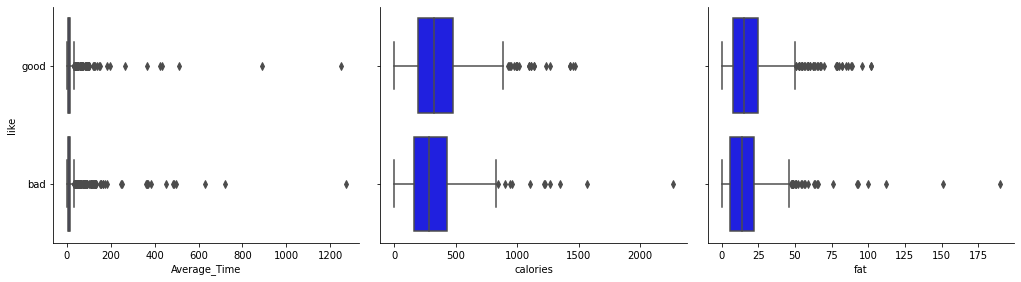

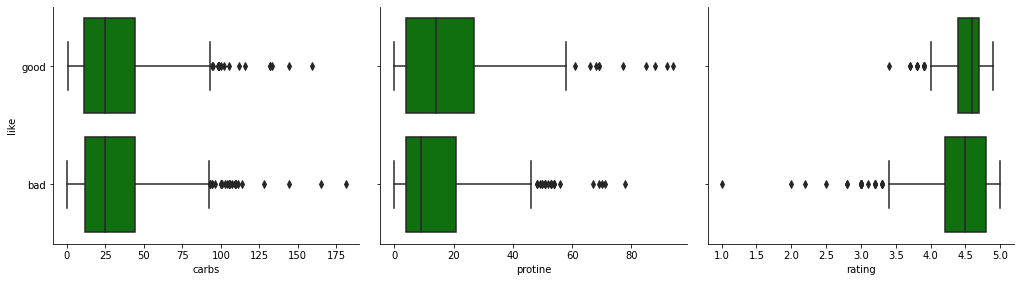

In [32]:
import seaborn as sns

# Create two grids with 3 columns each
g1 = sns.PairGrid(data, x_vars=["Average_Time", "calories", "fat"], y_vars='like', height=4, aspect=1.2)
g2 = sns.PairGrid(data, x_vars=['carbs', 'protine', 'rating'], y_vars='like', height=4, aspect=1.2)

# Plot the box plots for each column in the first grid
g1.map(sns.boxplot, orient='h', color='b')

# Plot the box plots for each column in the second grid
g2.map(sns.boxplot, orient='h', color='g')

# Show the plots
plt.show()

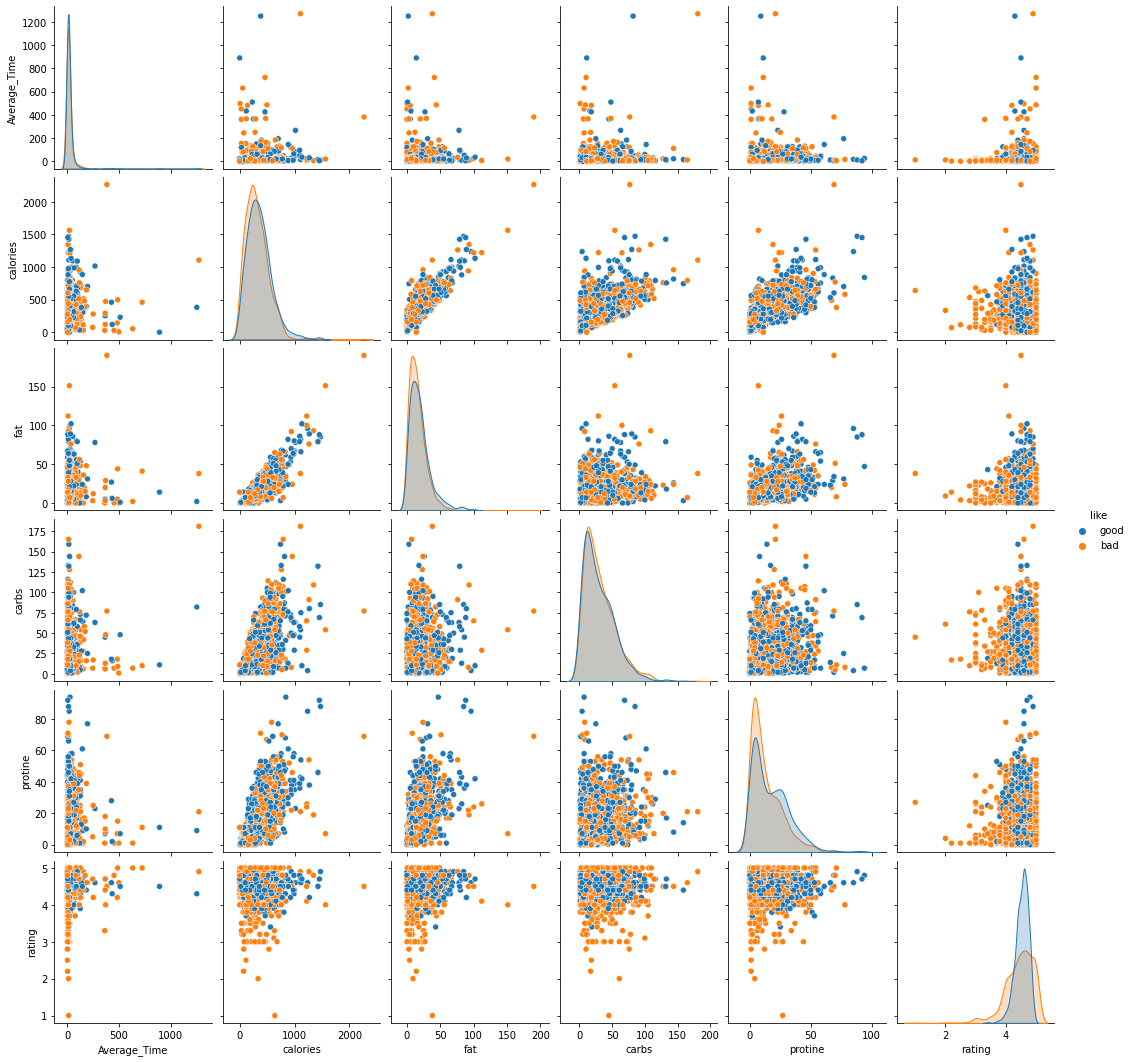

In [33]:
# Before removing outliers 
#sns.pairplot(data,vars=["servings", "total_time", "calories", "fat", "carbs", "protine", "rating"],hue= "like")
sns.pairplot(data,vars=["Average_Time", "calories", "fat", "carbs", "protine", "rating"],hue= "like")

In [34]:
def remove_outliers(data, column_name):
    # Calculate Q1, Q3, and IQR for the specified column
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outlier detection
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Identify the rows containing outliers and drop them from the dataset
    outlier_rows = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    data = data.drop(outlier_rows.index)

    # Return the modified dataset without the outlier rows
    return data

In [35]:
data_cleaned = remove_outliers(data,"Average_Time")
#data_cleaned = remove_outliers(data_cleaned, "total_time")
#data_cleaned = remove_outliers(data_cleaned, "total_time")
data_cleaned = remove_outliers(data_cleaned, "calories")
data_cleaned = remove_outliers(data_cleaned, "fat")
data_cleaned = remove_outliers(data_cleaned, "protine")
data_cleaned = remove_outliers(data_cleaned, "carbs")
data_cleaned.shape

(1378, 11)

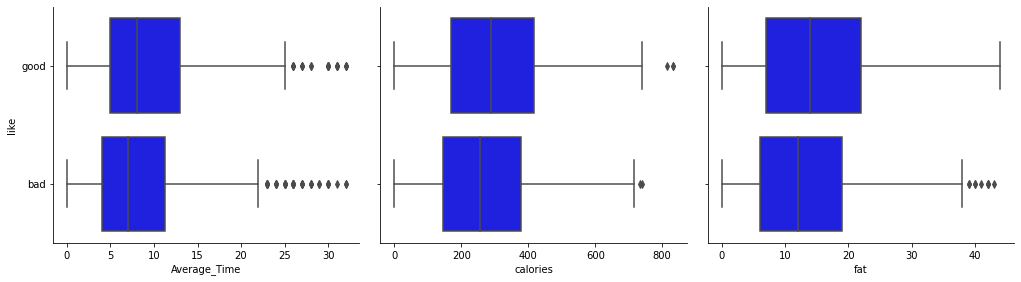

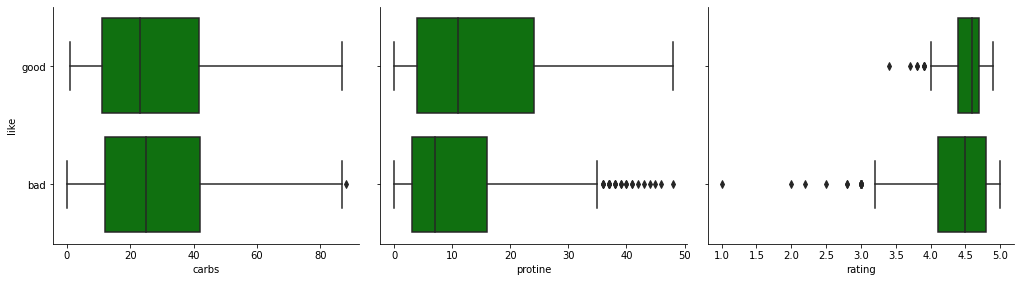

In [36]:
import seaborn as sns

# Create two grids with 3 columns each
g1 = sns.PairGrid(data_cleaned, x_vars=["Average_Time", "calories", "fat"], y_vars='like', height=4, aspect=1.2)
g2 = sns.PairGrid(data_cleaned, x_vars=['carbs', 'protine', 'rating'], y_vars='like', height=4, aspect=1.2)

# Plot the box plots for each column in the first grid
g1.map(sns.boxplot, orient='h', color='b')

# Plot the box plots for each column in the second grid
g2.map(sns.boxplot, orient='h', color='g')

# Show the plots
plt.show()

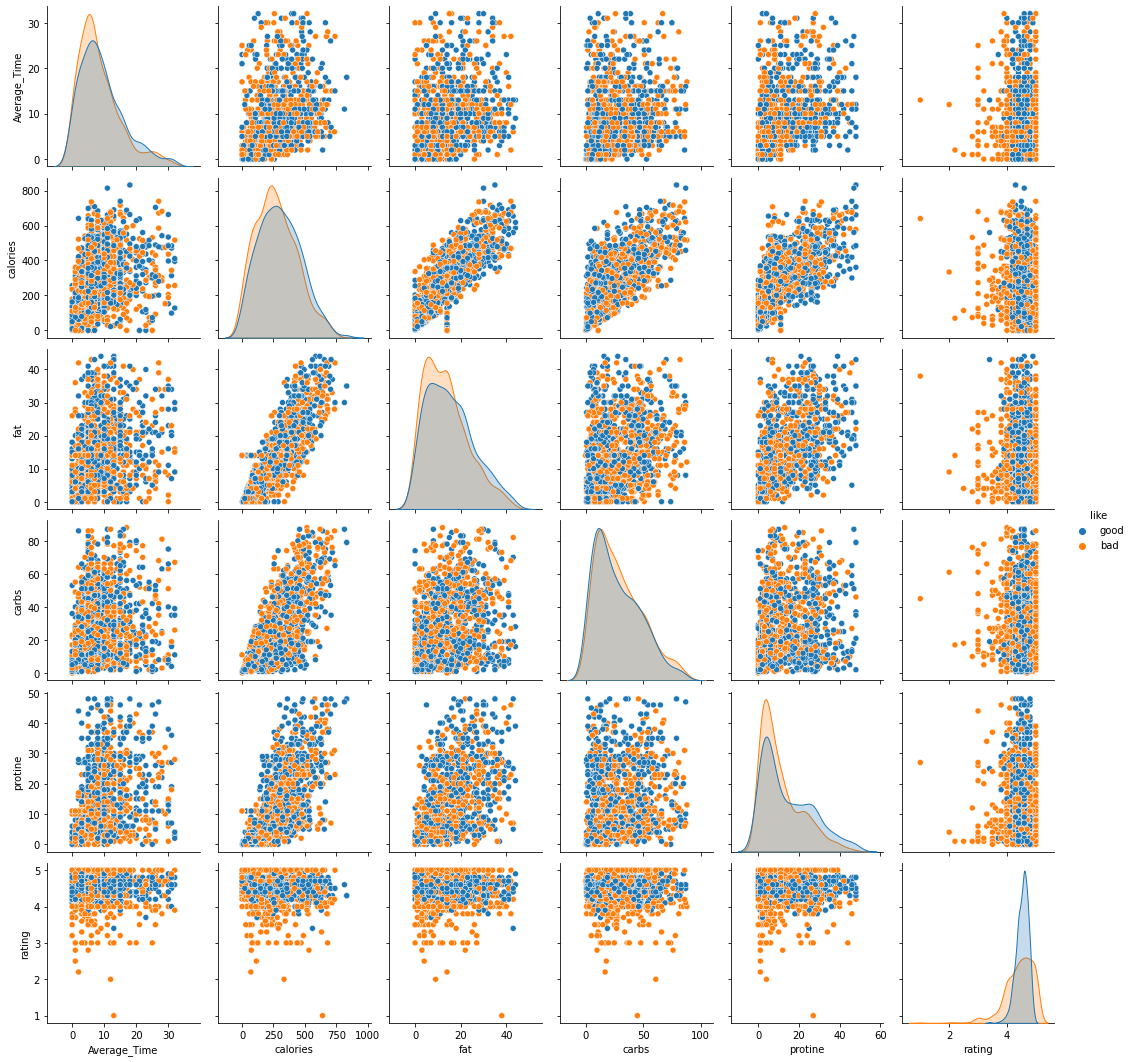

In [37]:
# Before removing outliers 
#sns.pairplot(data_cleaned,vars=["servings", "total_time", "calories", "fat", "carbs", "protine", "rating"],hue= "like")
sns.pairplot(data_cleaned,vars=["Average_Time", "calories", "fat", "carbs", "protine", "rating"],hue= "like")

In [38]:
# One hot encoding of target variable 
#data["like"] = data["like"].map({"good": 1, "bad": 0}) 
data_cleaned["like"] = data_cleaned["like"].map({"good": 1, "bad": 0}) 

In [39]:
data_cleaned["like"].isnull().sum()

0

# Building model

In [40]:
from sklearn.model_selection import train_test_split

# Getting subseting data 
#X = data[["Average_Time", "calories", "fat", "carbs", "protine", "rating"]]
#y = data["like"]

X = data_cleaned[["Average_Time", "calories", "fat", "carbs", "protine", "rating"]]
y = data_cleaned["like"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Evaluate the classifier on the training and testing data
print("Training error:", 1 - knn.score(X_train, y_train))
print("Testing error:", 1 - knn.score(X_test, y_test))

Training error: 0.2912885662431942
Testing error: 0.46739130434782605


In [42]:
from sklearn.tree import DecisionTreeClassifier

# Initialize classifiers
dt = DecisionTreeClassifier()

# Fit the classifiers on the training data
dt.fit(X_train, y_train)

# Evaluate the classifiers on the training and testing data
print("Classifier: DT")
print("Training error:", 1 - dt.score(X_train, y_train))
print("Testing error:", 1 - dt.score(X_test, y_test))

#MSE_Vs_Sample_Size(X_train, X_test, y_train, y_test, model = dt)

Classifier: DT
Training error: 0.0
Testing error: 0.39855072463768115


In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

print("Classifier: NB")
print("Training error:", 1 - nb.score(X_train, y_train))
print("Testing error:", 1 - nb.score(X_test, y_test))

#MSE_Vs_Sample_Size(X_train, X_test, y_train, y_test, model = nb)

Classifier: NB
Training error: 0.3166969147005445
Testing error: 0.32608695652173914


In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

print("Classifier: Logistic Regression")
print("Training error:", 1 - lr.score(X_train, y_train))
print("Testing error:", 1 - lr.score(X_test, y_test))

#MSE_Vs_Sample_Size(X_train, X_test, y_train, y_test, model = lr)

Classifier: Logistic Regression
Training error: 0.45462794918330307
Testing error: 0.4746376811594203


C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#MSE_Vs_Sample_Size(X_train, X_test, y_train, y_test, model = clf)

Accuracy: 0.6920289855072463


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create decision tree classifier object
dt = DecisionTreeClassifier(random_state=42)

# specify a range of values for the alpha parameter
param_grid = {'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}

# perform a grid search over the alpha parameter values using cross-validation
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best estimator (i.e., the decision tree with the best alpha value)
best_dt = grid_search.best_estimator_

# evaluate the performance of the pruned decision tree on the test data
print('Accuracy on test set: {:.3f}'.format(best_dt.score(X_test, y_test)))

Accuracy on test set: 0.659


In [47]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create SVM model object
clf = svm.SVC(kernel='linear', C=1, gamma='auto')

# fit SVM model to training data
clf.fit(X_train, y_train)

# predict target variable for test set
y_pred = clf.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5555555555555556


# Analysis on ingredints

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# create a CountVectorizer object
vectorizer = CountVectorizer()

# fit the vectorizer to the ingredient column
vectorizer.fit(data_cleaned['ingredints'])

# transform the ingredient column to a binary matrix
X = vectorizer.transform(data_cleaned['ingredints'])
y = data_cleaned["like"]

In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [50]:
# import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# initialize the classifiers
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
#nb = GaussianNB()
svm = SVC()

# train the classifiers on the training data
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
#nb.fit(X_train, y_train)
svm.fit(X_train, y_train)

# evaluate the performance of the classifiers on the testing data
lr_acc = accuracy_score(y_test, lr.predict(X_test))
dt_acc = accuracy_score(y_test, dt.predict(X_test))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
#nb_acc = accuracy_score(y_test, nb.predict(X_test))
svm_acc = accuracy_score(y_test, svm.predict(X_test))

# print the accuracy of each classifier
print("Logistic Regression Accuracy:", lr_acc)
print("Decision Tree Accuracy:", dt_acc)
print("K-Nearest Neighbors Accuracy:", knn_acc)
#print("Naive Bayes Accuracy:", nb_acc)
print("Support Vector Machine Accuracy:", svm_acc)

Logistic Regression Accuracy: 0.5905797101449275
Decision Tree Accuracy: 0.5543478260869565
K-Nearest Neighbors Accuracy: 0.5398550724637681
Support Vector Machine Accuracy: 0.6630434782608695


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of classification models
models = [
    LogisticRegression(),
    #GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

# Train and test each model
for model in models:
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{type(model).__name__} train accuracy: {train_acc:.2f}")
    print(f"{type(model).__name__} test accuracy: {test_acc:.2f}")


LogisticRegression train accuracy: 0.82
LogisticRegression test accuracy: 0.61
KNeighborsClassifier train accuracy: 0.72
KNeighborsClassifier test accuracy: 0.57
DecisionTreeClassifier train accuracy: 1.00
DecisionTreeClassifier test accuracy: 0.58
RandomForestClassifier train accuracy: 1.00
RandomForestClassifier test accuracy: 0.64
SVC train accuracy: 0.86
SVC test accuracy: 0.61


In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix

# assume X_train and y_train are your training data
# and X_test and y_test are your test data
X_train_sparse = csr_matrix(X_train)  # convert to sparse matrix
X_test_sparse = csr_matrix(X_test)  # convert to sparse matrix

MNB = MultinomialNB()
MNB.fit(X_train_sparse.toarray(), y_train)
y_pred = MNB.predict(X_test_sparse.toarray())

train_acc = accuracy_score(y_train, MNB.predict(X_train_sparse.toarray()))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.7232304900181489
Test accuracy: 0.6268115942028986


# Combining both the model

In [53]:
# create a CountVectorizer object
vectorizer = CountVectorizer()
# fit the vectorizer to the ingredient column
vectorizer.fit(data_cleaned['ingredints'])
# transform the ingredient column to a binary matrix
X = vectorizer.transform(data_cleaned['ingredints'])
model = MultinomialNB()
model.fit(X, y)
#pred = model.predict(X2)
pred = model.predict_proba(X)[:, 1] 
# get the probability of the "good" class for model

data_cleaned["Prob_Ingredint_MNB"] = pred
data_cleaned.head()

,name,servings,total_time,ingredints,calories,fat,carbs,protine,rating,like,Average_Time,Prob_Ingredint_MNB
1,Seafood Gumbo,8,105,"['pepper', 'pepper', 'pepper', 'paprika', 'thy...",357,24,13,23,4.5,1,13,0.999964
2,Air-Fried Korean Chicken Wings,4,50,"['Honey', 'paste', 'sugar', 'sauce', 'juice', ...",347,12,45,16,4.8,0,12,0.870261
4,Okra and Tomatoes,6,30,"['bacon', 'okra', 'sliced', 'onion', 'chopped'...",94,5,12,4,4.6,1,5,0.991616
5,Portuguese Sweet Bread I,12,185,"['milk', 'egg', 'margarine', 'sugar', 'salt', ...",56,3,7,2,4.7,1,15,0.232890
6,Simple Cajun Seasoning,20,5,"['salt', 'oregano', 'paprika', 'pepper', 'pepp...",3,0,1,0,4.5,1,0,0.860022


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Getting subseting data 
X = data_cleaned[["Prob_Ingredint_MNB","Average_Time", "calories", "fat", "carbs", "protine", "rating"]]
y = data_cleaned["like"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)


# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7644927536231884
